# Installations

In [1]:
# pip install xgboost
# pip install optuna

## Imports

In [177]:
import numpy as np
import pandas as pd

#plots
import matplotlib.pyplot as plt
import seaborn as sns

#models
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, plot_importance

from sklearn.linear_model import LogisticRegression as LR

#evaluation and metrics
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix,classification_report
import optuna

# Load Data

In [178]:
data=pd.read_csv('./train.csv')

# Data Overview

* The dataset for this competition (both train and test) was generated from a deep learning model trained on the Obesity or CVD risk dataset. Feature distributions are close to, but not exactly the same, as the original.
* The original data consist of the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition.

| Column                              | Full Form                                    | Description                                                                                      |
|-------------------------------------|----------------------------------------------|--------------------------------------------------------------------------------------------------|
| id                                | id                                           | Unique for each person(row)                                                                      |
| Gender                            | Gender                                       | Persons Gender                                                                                  |
| Age'                               | Age                                          | Dtype is float. Age is between 14 years to 61 years                                               |
| 'Height'                            | Height                                       | Height is in meter it's between 1.45m to 1.98m                                                   |
| 'Weight'                            | Weight                                       | Weight in Kg, it's between 39 to 165.                                                 |
| 'family_history_with_overweight'    | family history with overweight             | Yes or no question                                                                               |
| 'FAVC'                              | Frequent consumption of high calorie food  | yes or no question.  |
| 'FCVC'                              | Frequency of consumption of vegetables     | Similar to FAVC. This is also a yes or no question.                                              |
| 'NCP'                               | Number of main meals                        | Dtype is float, NCP is between 1 & 4. I think it should be 1, 2, 3, or 4, but our data is synthetic so it's taking float values |
| 'CAEC'                              | Consumption of food between meals          | Takes 4 values= Sometimes, Frequently, No, & Always                                             |
| 'SMOKE'                             | Smoke                                        | Yes or no question.                                      |
| 'CH2O'                              | Consumption of water daily                  | CH2O takes values between 1 & 3. Again, it's given as a float. Its values should be 1, 2, or 3. |
| 'SCC'                               | Calories consumption monitoring             | Yes or no question                                                                               |
| 'FAF'                               | Physical activity frequency                 | FAF is between 0 to 3, 0 means no physical activity and 3 means high workout. Again, in our data, it's given as a float |
| 'TUE'                               | Time using technology devices               | TUE is between 0 to 2. I think the question will be, "How long have you been using technology devices to track your health?" In our data, it's given as a float |
| 'CALC'                              | Consumption of alcohol                     | Takes 4 values= Sometimes, No, Frequently, & Always                                               |
| 'MTRANS'                            | Transportation used                        | MTRANS takes 5 values: Public_Transportation, Automobile, Walking, Motorbike, & Bike               |
| 'NObeyesdad'                        | TARGET                                       | This is our target, takes 7 values. In this comp., we have to give the class name (Not the Probability, which is the case in most comp.) |


In [179]:
data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


#### Check for missing values

In [180]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

#### Summery of the numerical data

In [181]:
data.drop(columns=['id']).describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


### Split the data to Target (y) and Features (x)

In [182]:
x = data.drop(['NObeyesdad', 'id'],axis=1)
y = data['NObeyesdad']

#### Target Distribution


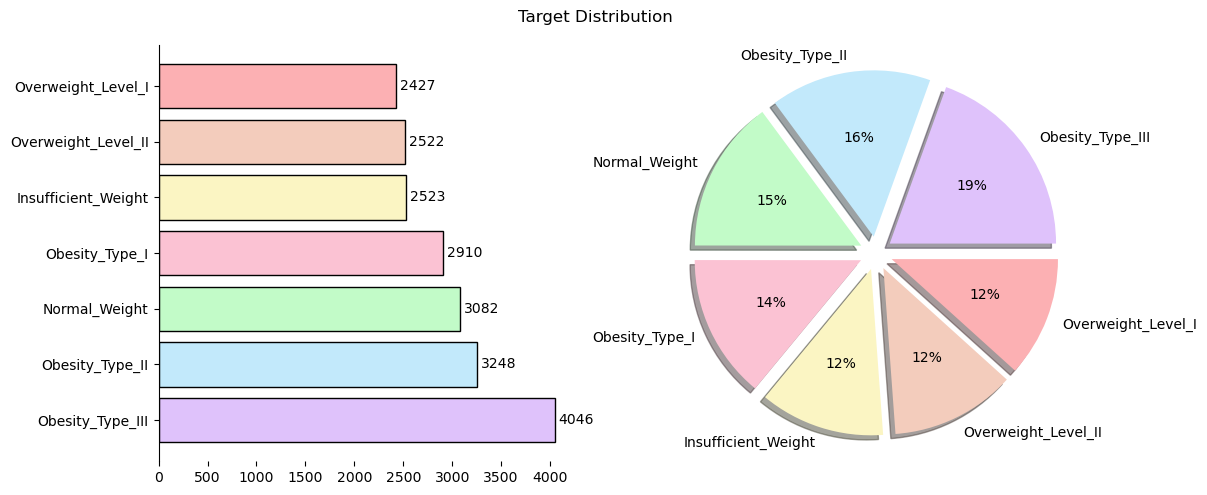

In [183]:
df = pd.DataFrame({'Category': y.value_counts().index, 'Value': y.value_counts().values})


fig, axs = plt.subplots(1, 2, figsize=(12, 5))
plt.suptitle("Target Distribution")

# Define the color palette
pastel_colors = ['#dfc2fb', '#c2e9fb', '#c2fbc8', '#fbc2d3', '#fbf5c3', '#f3ccbc', '#fcb0b3']

# Bar chart
bars = axs[0].barh(df['Category'], df['Value'], color=pastel_colors, edgecolor='black')

# Display the value next to each bar
for bar in bars:
    width = bar.get_width()
    label_x_pos = width + max(df['Value']) * 0.01
    axs[0].text(label_x_pos, bar.get_y() + bar.get_height() / 2, str(width), va='center')

# Remove x-axis line for bar chart
axs[0].spines['bottom'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)

# Pie chart
wedges, texts, autotexts = axs[1].pie(
    df['Value'],
    shadow=True,
    explode=[.1 for i in range(y.nunique())],
    labels=df['Category'],
    autopct='%1.f%%',
    colors=pastel_colors
)

# Set the same color for the pie chart labels
for text in texts:
    text.set_color('black')

# Set the same color for the pie chart percentage labels
for autotext in autotexts:
    autotext.set_color('black')

plt.tight_layout()
plt.show()


#### Categorical Features Distribution

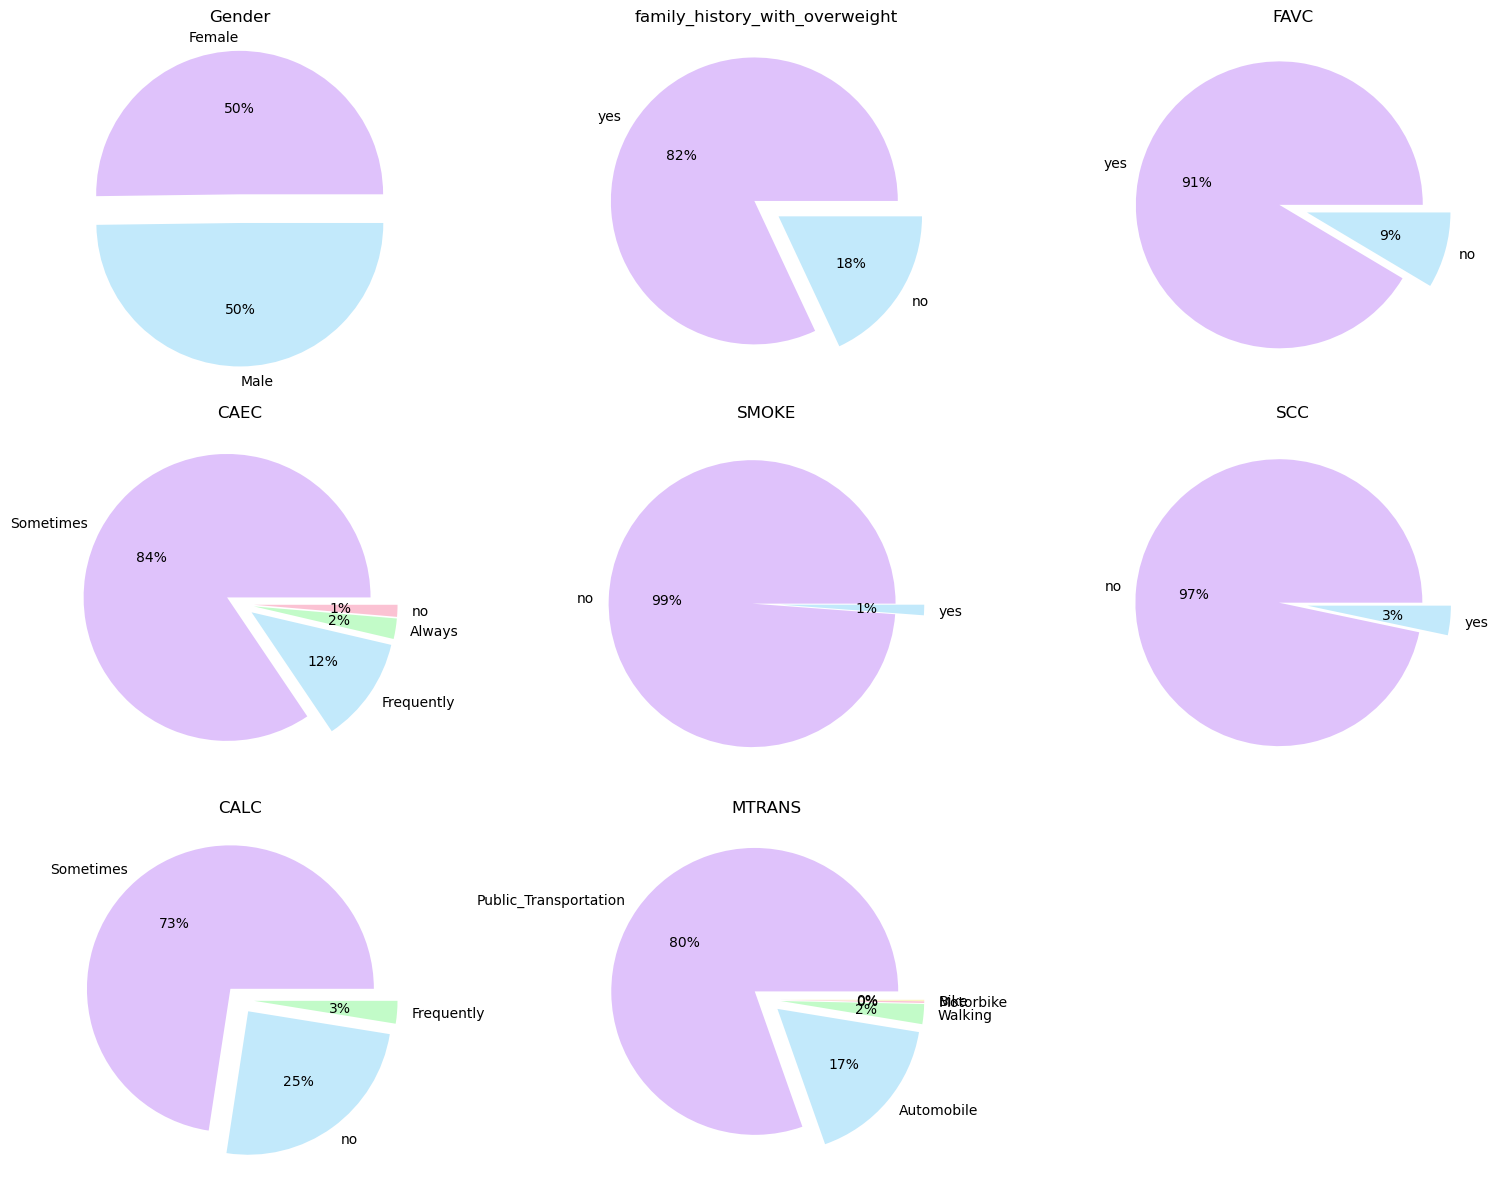

In [184]:
# Count plots for categorical variables
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    # sns.countplot(data=x, x=col)
    plt.pie(x[col].value_counts(),
            explode=[.1 for i in range(x[col].nunique())],
            labels=x[col].value_counts().index,
            autopct='%1.f%%',
            colors=pastel_colors)
    plt.title(col)

plt.tight_layout()
plt.show()

In [185]:
df_x = pd.get_dummies(x, drop_first=True)
df_x.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,1,1,...,1,0,0,0,1,0,0,0,1,0
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,0,1,...,0,0,0,0,0,1,0,0,0,0
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,0,1,...,1,0,0,0,0,1,0,0,1,0
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,0,1,...,1,0,0,0,1,0,0,0,1,0
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,1,1,...,1,0,0,0,1,0,0,0,1,0


### Preprocessing - Adding BMI calculated predictor (BMI = Weight/Height^2)

In [186]:
df_x['BMI'] = data['Weight'] / ((data['Height'] / 100) ** 2)

## Preprocceing the target data

This code is not working, apparently LabelEncoder is not working with custom order.
The function 'fit' ignore the custom order and will sort the classes in alphabetical order.

In [187]:
# custom_order = [
#     'Insufficient_Weight',
#     'Normal_Weight',
#     'Overweight_Level_I',
#     'Overweight_Level_II',
#     'Obesity_Type_I',
#     'Obesity_Type_II',
#     'Obesity_Type_III'
# ]

# # Create a LabelEncoder object
# le = LabelEncoder()

# # Fit the encoder with the custom order
# le.fit(custom_order)

# # Transform your original labels
# y_encode = le.transform(y)
# le = LabelEncoder()
# y_encode = le.fit_transform(y)
# print(y[:5])
# print(y_encode[:5])

In [188]:
custom_order = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}

y_encode = [custom_order[label] for label in y]
print(y_encode[:5])
print(y[:5])

[3, 1, 0, 6, 3]
0    Overweight_Level_II
1          Normal_Weight
2    Insufficient_Weight
3       Obesity_Type_III
4    Overweight_Level_II
Name: NObeyesdad, dtype: object


### Correlation Heatmap 

Text(0.5, 1.0, 'Correlation Heatmap')

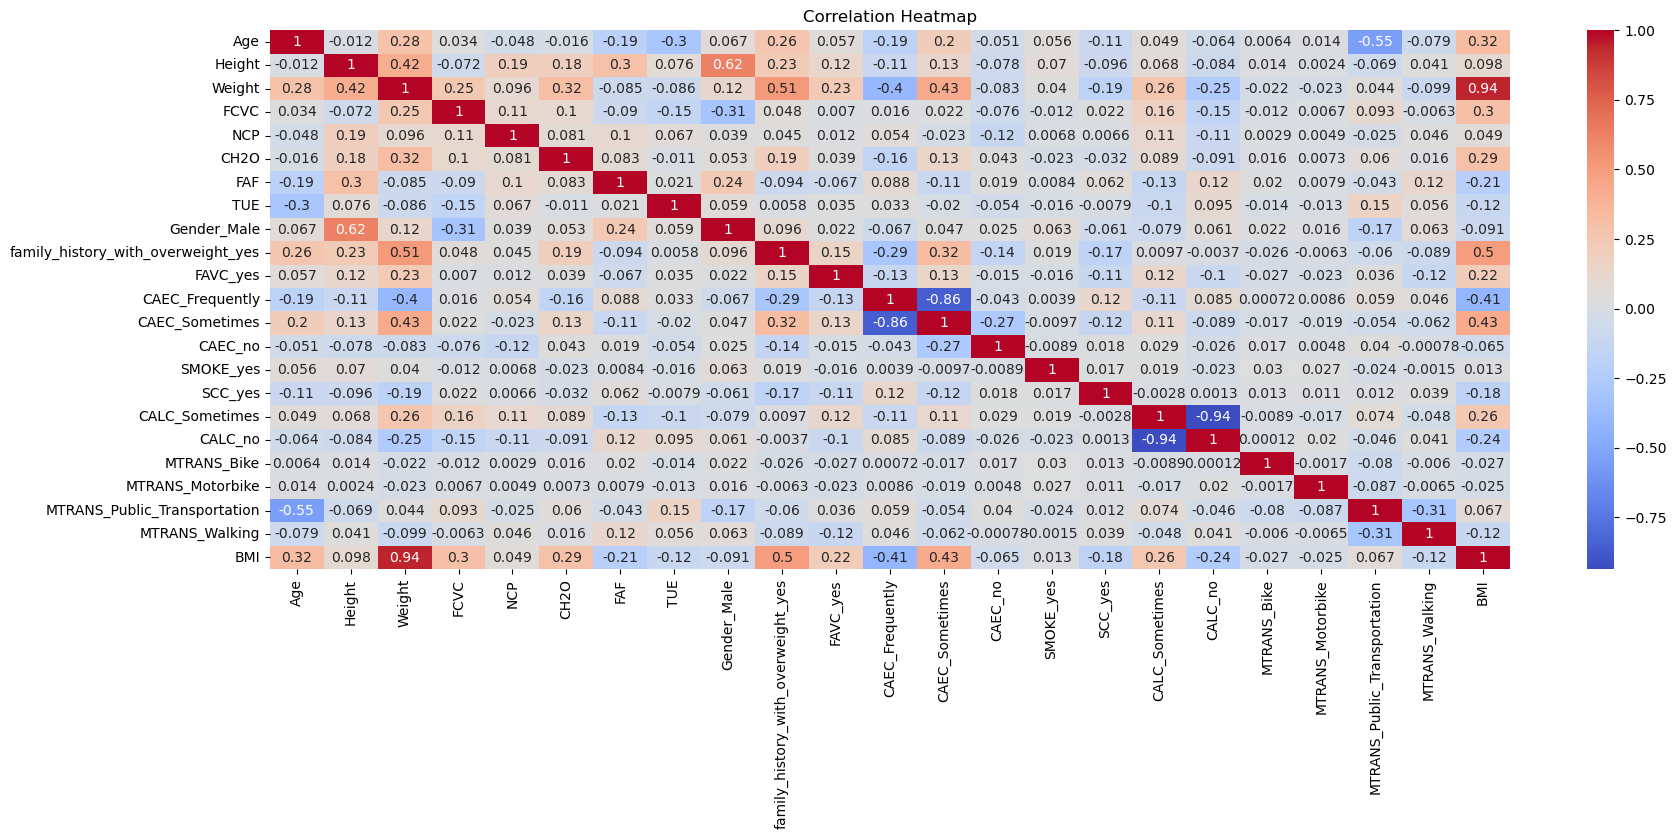

In [189]:
plt.figure(figsize=(20,7))
corr_heatmap = sns.heatmap(df_x.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')

## Split the data into training and validation sets

In [190]:
x_train, x_test, y_train, y_test = train_test_split(df_x, y_encode, test_size=0.2, random_state=42)
x_train.shape, x_test.shape

((16606, 23), (4152, 23))

### Cross Validation

In [191]:
cvStratKFold = StratifiedKFold(5, shuffle=True, random_state=42)
def cross_validation_accuracy_evaluation(model, x, y):
    scores = cross_val_score(estimator=model,X=x,y=y,scoring='accuracy',cv=cvStratKFold)
    accuracy = np.mean(scores)

    return accuracy

### Confusion Matrix

In [192]:
def confusion_matrix_evaluation(model, x, y, y_pred):
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.title('Confusion Matrix')
    plt.show()
    return cm

# Decision Tree Model

We start by fitting a simple decision tree model to the data. We will use the default parameters for the decision tree model.

In [193]:
dtc_model = DecisionTreeClassifier(random_state=42)
dtc_model = dtc_model.fit(x_train, y_train)

In [194]:
dtc_model.score(x_test, y_test)

0.8420038535645472

We can use see that the simple Decision Tree model has an accuracy of 0.84. We will now try to improve the model accuracy.

We will try pruning the tree using different values of alpha.

In [195]:
path = dtc_model.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

Now we wiil find the best alpha using cross validation.

In [196]:
alpha_values = []
dtc_models_list = []

for cpp_alpha in ccp_alphas:
    dtc_model = DecisionTreeClassifier(random_state=42, ccp_alpha=cpp_alpha)
    accuracy =  cross_validation_accuracy_evaluation(dtc_model, x_train, y_train)
    alpha_values.append([cpp_alpha, accuracy])
    dtc_model.fit(x_train, y_train)
    dtc_models_list.append(dtc_model)

Let's plot the accuracy of the model on the training sets as a function of alpha to see the behavior of the model.

In [197]:
alpha_results = pd.DataFrame(alpha_values, columns=['alpha', 'mean_accuracy'])

alpha_best_result = alpha_results[alpha_results['mean_accuracy'] == alpha_results['mean_accuracy'].max()]
best_alpha = alpha_best_result['alpha'].values[0]

print('Best alpha and accuracy:')
alpha_best_result

Best alpha and accuracy:


,alpha,mean_accuracy
876,0.000250,0.878357
877,0.000251,0.878357


<Figure size 1500x600 with 0 Axes>

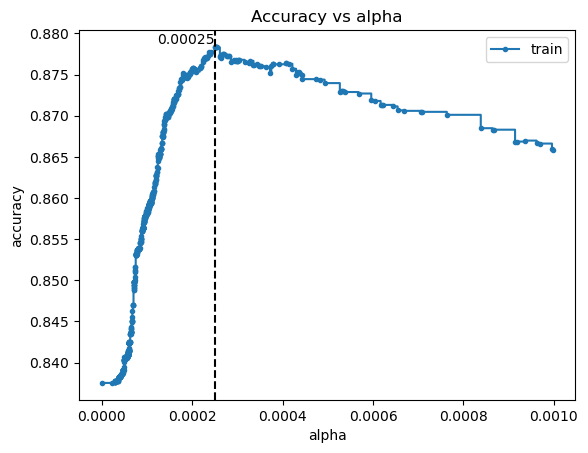

In [198]:
plot_alpha_treshhold = 0.001

alpha_results = pd.DataFrame(alpha_values, columns=['alpha', 'mean_accuracy'])
alpha_results_filtered = alpha_results[alpha_results['alpha'] <= plot_alpha_treshhold]


plt.figure(figsize=(15, 6))
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha")
ax.plot(alpha_results_filtered['alpha'], alpha_results_filtered['mean_accuracy'], marker=".",  label="train", drawstyle="steps-post")
ax.legend()

# Display the best alpha value
best_alpha_value = round(alpha_best_result['alpha'].values[0], 5)
plt.text(best_alpha_value, alpha_best_result['mean_accuracy'].values[0], f'{best_alpha_value}', ha='right', va='bottom')
ax.axvline(x=alpha_best_result['alpha'].values[0], color='black', linestyle='--', label='Best Alpha')

plt.show()


We will deploy a plot to see accuracy behavior as function of alpha to evaluate overfit on training data.

In [199]:
train_scores = [dtc_model.score(x_train, y_train) for dtc_model in dtc_models_list]
test_scores =  [dtc_model.score(x_test, y_test) for dtc_model in dtc_models_list]

cpp_alpha_filtered = [alpha for alpha in ccp_alphas if alpha <= plot_alpha_treshhold]

train_scores_filtered = [score for score, alpha in zip(train_scores, ccp_alphas) if alpha <= plot_alpha_treshhold]
test_scores_filtered = [score for score, alpha in zip(test_scores, ccp_alphas) if alpha <= plot_alpha_treshhold]

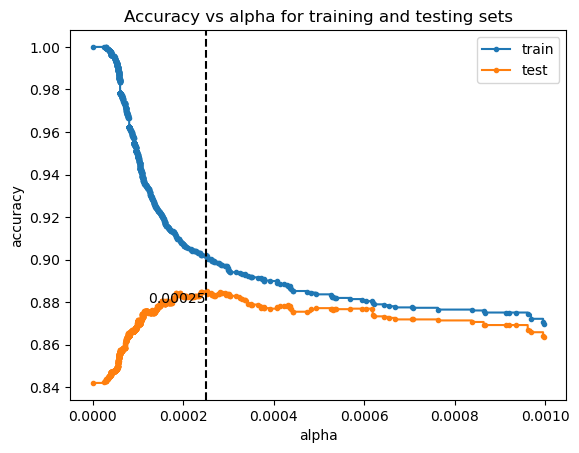

In [200]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(cpp_alpha_filtered, train_scores_filtered, marker=".", label="train", drawstyle="steps-post")
ax.plot(cpp_alpha_filtered, test_scores_filtered, marker=".", label="test", drawstyle="steps-post")
ax.legend()

# Display the best alpha value
best_alpha_value = round(alpha_best_result['alpha'].values[0], 5)
plt.text(best_alpha_value, alpha_best_result['mean_accuracy'].values[0], f'{best_alpha_value}', ha='right', va='bottom')
ax.axvline(x=alpha_best_result['alpha'].values[0], color='black', linestyle='--', label='Best Alpha')

plt.show()

In [201]:
dtc_model_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
dtc_model_pruned = dtc_model_pruned.fit(x_train, y_train)

In [202]:
print("Train accuracy: " ,dtc_model_pruned.score(x_train, y_train))
dtc_accuracy = dtc_model_pruned.score(x_test, y_test)
print("Test accuracy: " , dtc_accuracy)

Train accuracy:  0.9019631458508973
Test accuracy:  0.8848747591522158


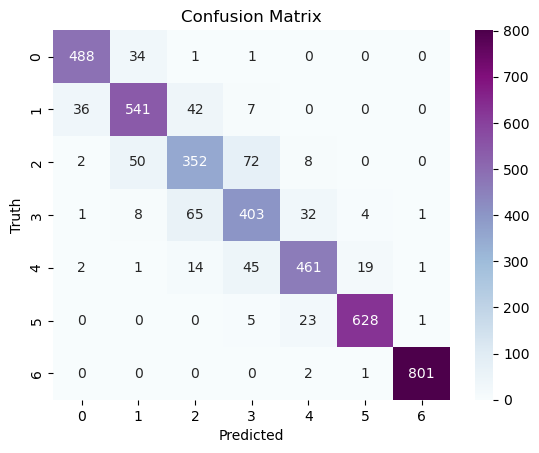

array([[488,  34,   1,   1,   0,   0,   0],
       [ 36, 541,  42,   7,   0,   0,   0],
       [  2,  50, 352,  72,   8,   0,   0],
       [  1,   8,  65, 403,  32,   4,   1],
       [  2,   1,  14,  45, 461,  19,   1],
       [  0,   0,   0,   5,  23, 628,   1],
       [  0,   0,   0,   0,   2,   1, 801]], dtype=int64)

In [203]:
y_pred_dtc = dtc_model_pruned.predict(x_test)
confusion_matrix_evaluation(dtc_model_pruned, x_test, y_test, y_pred_dtc)

In [204]:
# Generate classification report
print("\nClassification Report:")
dtc_model_results = classification_report(y_test, y_pred_dtc, output_dict=True)
print(classification_report(y_test, y_pred_dtc))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       524
           1       0.85      0.86      0.86       626
           2       0.74      0.73      0.73       484
           3       0.76      0.78      0.77       514
           4       0.88      0.85      0.86       543
           5       0.96      0.96      0.96       657
           6       1.00      1.00      1.00       804

    accuracy                           0.88      4152
   macro avg       0.87      0.87      0.87      4152
weighted avg       0.89      0.88      0.88      4152



## XGBoost Classifier Model

In [206]:
def objective(trial):
    trial_number = trial.number
    print(f'Trial {trial_number} in progress')
    # Define the hyperparameters to be optimized
    params = {
        'booster': 'gbtree',
        'objective': 'multi:softmax',
        'num_class': 7,
        'eval_metric': 'merror',
        'n_estimators': trial.suggest_int('n_estimators', 100,300),
        'min_split_loss': trial.suggest_float('min_split_loss', 1e-9, 0.5),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0,log=True),
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'subsample': trial.suggest_float('subsample', 0.1, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-9, 100.0, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-9, 100.0, log=True)
    }

    # Create an XGBoost Classifier
    xgbModel = XGBClassifier(**params, random_state=42)

    # Evaluate the model using accuracy with cross validation
    accuracy =  cross_validation_accuracy_evaluation(xgbModel, x_train, y_train)
    
    return accuracy

Optuna optimization is commented because of it's long execution time. The final parameters are declared hardcoded in the next cells.

In [ ]:
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)
# trial = study.best_trial

# # Print the best hyperparameters
# print(f"Best accuracy: {trial.value}")
# print(f"Best hyperparameters: {trial.params}")

# best_params = {
#     'booster': 'gbtree',
#     'objective': 'multi:softmax',
#     'num_class': 7,
#     'eval_metric': 'merror',
#     'n_estimators': trial.params['n_estimators'],
#     'min_split_loss': trial.params['min_split_loss'],
#     'learning_rate': trial.params['learning_rate'],
#     'max_depth': trial.params['max_depth'],
#     'subsample': trial.params['subsample'],
#     'colsample_bytree': trial.params['colsample_bytree'],
#     'min_child_weight': trial.params['min_child_weight'],
#     'reg_lambda': trial.params['reg_lambda'],
#     'reg_alpha': trial.params['reg_alpha']
# }

In [ ]:
# optuna.visualization.plot_optimization_history(study)

In [ ]:
# xgb_model = XGBClassifier(**best_params)
# xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.464619953659227, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='merror', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.11116200495849704,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=9, min_split_loss=0.4208847976736245,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=164, n_jobs=None, num_class=7, ...)

In [208]:
# Best -> 0.9096820809248555

xgb_model = XGBClassifier(
    booster= 'gbtree',
    objective= 'multi:softmax',
    num_class= 7,
    n_estimators= 249,
    eval_metric= 'merror',
    min_split_loss= 0.07562076566063626,
    learning_rate= 0.1324886494002871,
    max_depth= 6,
    subsample= 0.6956968385001208,
    colsample_bytree= 0.6397175848114321,
    min_child_weight= 4,
    reg_lambda= 3.3993098383308354e-05,
    reg_alpha= 3.3871516324124937
)

xgb_model.fit(x_train, y_train)


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6397175848114321, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='merror', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1324886494002871,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=4, min_split_loss=0.07562076566063626,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=249, n_jobs=None, num_class=7, ...)

Training accuracy and Validation accuracy

In [216]:
print('Training accuracy:', xgb_model.score(x_train, y_train))
xgb_accuracy = xgb_model.score(x_test, y_test)
print('Testing accuracy:',  xgb_accuracy)

Training accuracy: 0.9498374081657233
Testing accuracy: 0.9079961464354528


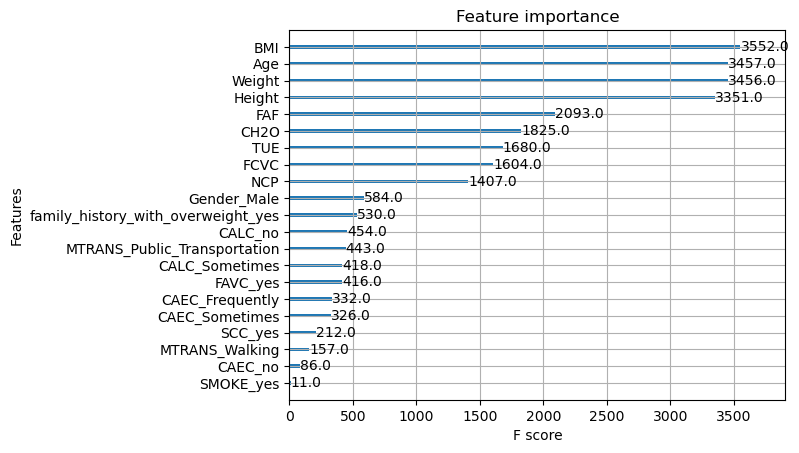

In [217]:
#Plot feature importance
plot_importance(xgb_model, importance_type='weight')
plt.show()

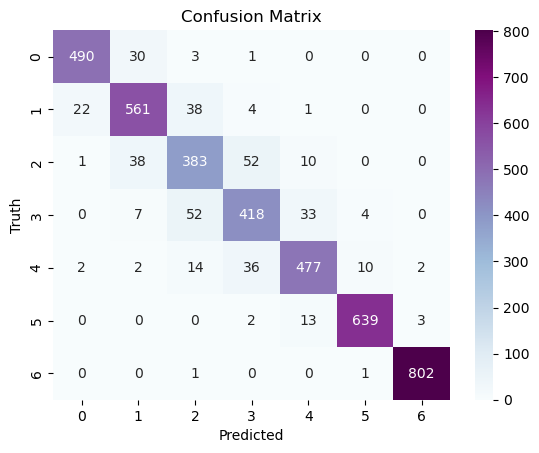

array([[490,  30,   3,   1,   0,   0,   0],
       [ 22, 561,  38,   4,   1,   0,   0],
       [  1,  38, 383,  52,  10,   0,   0],
       [  0,   7,  52, 418,  33,   4,   0],
       [  2,   2,  14,  36, 477,  10,   2],
       [  0,   0,   0,   2,  13, 639,   3],
       [  0,   0,   1,   0,   0,   1, 802]], dtype=int64)

In [218]:
y_pred_xgb = xgb_model.predict(x_test)
confusion_matrix_evaluation(xgb_model, x_test, y_test, y_pred_xgb)

In [219]:
# Generate classification report
print("\nClassification Report:")
xgb_model_results = classification_report(y_test, y_pred_xgb, output_dict=True)
print(classification_report(y_test, y_pred_xgb))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       524
           1       0.88      0.90      0.89       626
           2       0.78      0.79      0.79       484
           3       0.81      0.81      0.81       514
           4       0.89      0.88      0.89       543
           5       0.98      0.97      0.97       657
           6       0.99      1.00      1.00       804

    accuracy                           0.91      4152
   macro avg       0.90      0.90      0.90      4152
weighted avg       0.91      0.91      0.91      4152



### Comparation to article's results

In [220]:
#article 1
xgb_model_comp1 = XGBClassifier(
    booster= 'gbtree',
    objective= 'reg:logistic',
    n_estimators = 100,
    colsample_bytree = 0.8,
    eta = 0.5,
    gamma = 0, 
    max_depth = 5,
    max_leaves = 0,
    reg_alpha = 0,
    reg_lambda = 1.4583333333333335,
    subsample = 0.8,
    tree_method = "auto" 
)
xgb_model_comp1.fit(x_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.5, eval_metric=None,
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=0, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [221]:
xgb_model_comp1_acc = xgb_model_comp1.score(x_test, y_test)
print('article 1: Testing accuracy:',  xgb_model_comp1_acc)

article 1: Testing accuracy: 0.901252408477842


In [222]:
#article 3
xgb_model_comp3 = XGBClassifier(
    booster= 'gbtree',
    n_estimators = 998,
    max_depth = 80,
    learning_rate= 0.1
)
xgb_model_comp3.fit(x_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=80, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=998, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [223]:
xgb_model_comp3_acc = xgb_model_comp3.score(x_test, y_test)
print('article 3: Testing accuracy:',  xgb_model_comp3_acc)

article 3: Testing accuracy: 0.896917148362235


## Logistic Regression

In [224]:
lr_models = [
    LR(penalty='l1', solver='liblinear',random_state=42,max_iter=1000,n_jobs=1),
    LR(penalty='l2', solver='lbfgs', random_state=42,max_iter=1000,n_jobs=-1),
    LR(penalty='l2', solver='newton-cg', random_state=42,max_iter=1000,n_jobs=-1),
    LR(penalty='l2', solver='liblinear', random_state=42,max_iter=1000,n_jobs=1),
    LR(penalty=None, solver='lbfgs', random_state=42,max_iter=1000,n_jobs=-1),
    LR(penalty=None, solver='newton-cg', random_state=42,max_iter=1000,n_jobs=-1)
]

In [225]:
lr_models_fitted = [model.fit(x_train, y_train) for model in lr_models]

In [226]:
lr_models_scores = [lr_model.score(x_test, y_test) for lr_model in lr_models_fitted]
best_lr_pos = np.argmax(lr_models_scores)
best_lr_model = lr_models_fitted[best_lr_pos]

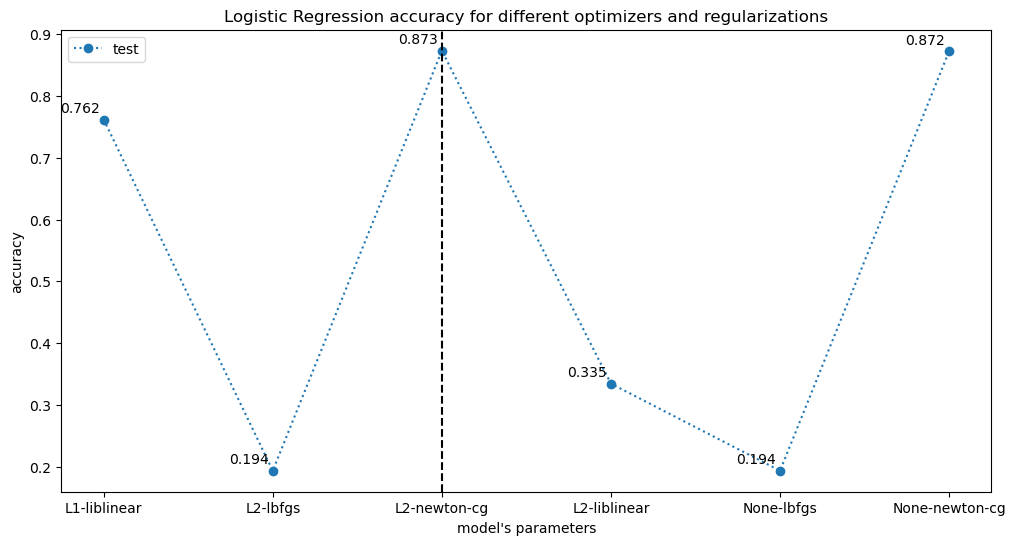

In [227]:
lr_models_labels = [
    'L1-liblinear',
    'L2-lbfgs',
    'L2-newton-cg',
    'L2-liblinear',
    'None-lbfgs',
    'None-newton-cg'
]

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xlabel("model's parameters")
ax.set_ylabel("accuracy")
ax.set_title("Logistic Regression accuracy for different optimizers and regularizations")
ax.plot(lr_models_labels, lr_models_scores, marker="o", linestyle='dotted',  label="test")
ax.legend()


# # Display the best alpha value
best_lr_accuracy = round(lr_models_scores[best_lr_pos], 5)
ax.axvline(x=best_lr_pos, color='black', linestyle='--', label='Best Alpha')

for x, y in zip(lr_models_labels, lr_models_scores):
    ax.annotate(f'{y:.3f}', (x, y), textcoords="offset points", xytext=(-17,5), ha='center')


plt.show()

In [228]:
best_lr_model = lr_models_fitted[best_lr_pos]

In [229]:
print('Training accuracy:', best_lr_model.score(x_train, y_train))
lr_accuracy = lr_models_scores[best_lr_pos]
print('Test accuracy:', lr_accuracy)

Training accuracy: 0.8677586414548958
Test accuracy: 0.8730732177263969


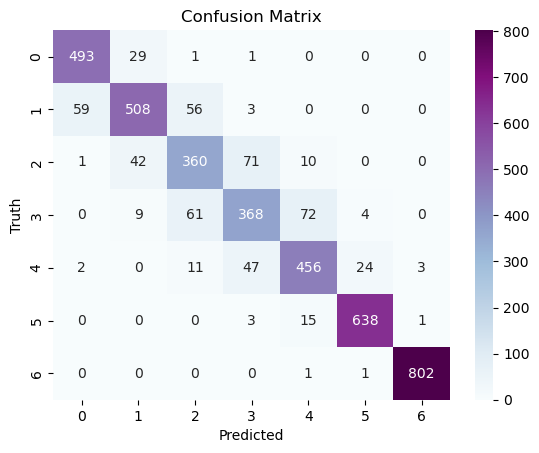

In [230]:
y_pred_lr= best_lr_model.predict(x_test)
cm_lr = confusion_matrix_evaluation(best_lr_model, x_test, y_test ,y_pred_lr)

In [231]:
# Generate classification report
print("\nClassification Report:")
lr_model_results = classification_report(y_test, y_pred_lr, output_dict=True)
print(classification_report(y_test, y_pred_lr))


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       524
           1       0.86      0.81      0.84       626
           2       0.74      0.74      0.74       484
           3       0.75      0.72      0.73       514
           4       0.82      0.84      0.83       543
           5       0.96      0.97      0.96       657
           6       1.00      1.00      1.00       804

    accuracy                           0.87      4152
   macro avg       0.86      0.86      0.86      4152
weighted avg       0.87      0.87      0.87      4152



## Comparison

In [232]:
# List of dictionaries for all three models
model_results = [dtc_model_results, xgb_model_results, lr_model_results]
model_names = ['Decision Tree', 'XGBoost', 'Logistic Regression']

# Calculate average scores across all classes for each metric for each model
avg_scores = {}
for model_name, model_result in zip(model_names, model_results):
    avg_scores[model_name] = {}
    for metric in ['precision', 'recall', 'f1-score']:
        scores = [model_result[class_name][metric] for class_name in model_result.keys() if class_name.isdigit()]
        avg_scores[model_name][metric] = np.mean(scores)
    avg_scores[model_name]['accuracy'] = model_result['accuracy']

# Print average scores for each model
print("Average Scores:")
for model_name, scores in avg_scores.items():
    print(f"{model_name}:")
    for metric, score in scores.items():
        print(f"   {metric}: {score:.2f}")

Average Scores:
Decision Tree:
   precision: 0.87
   recall: 0.87
   f1-score: 0.87
   accuracy: 0.88
XGBoost:
   precision: 0.90
   recall: 0.90
   f1-score: 0.90
   accuracy: 0.91
Logistic Regression:
   precision: 0.86
   recall: 0.86
   f1-score: 0.86
   accuracy: 0.87


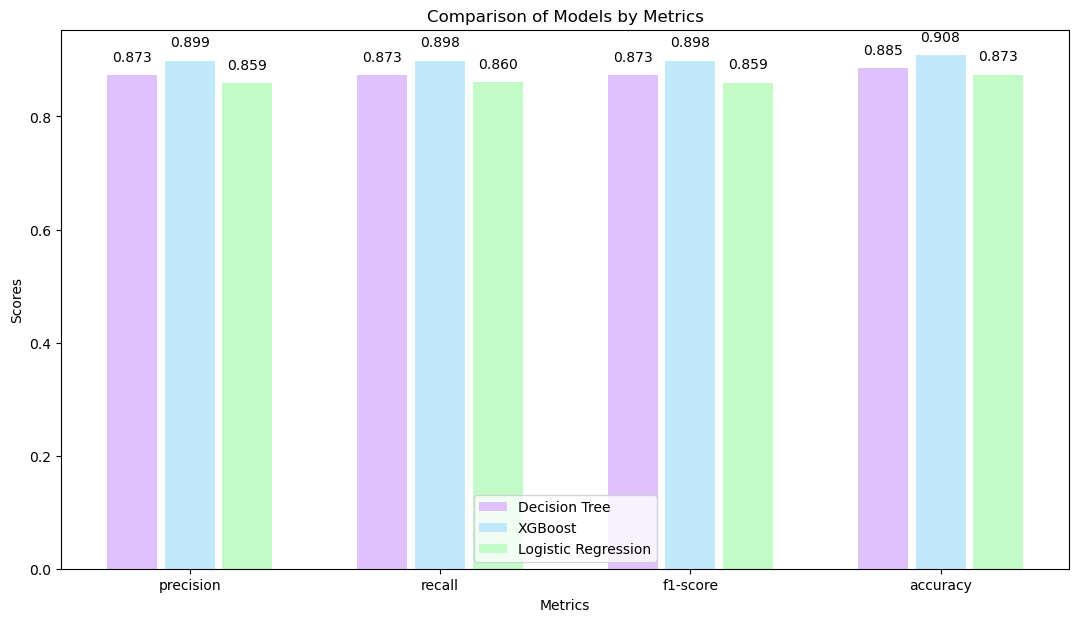

In [233]:
metrics = ['precision', 'recall', 'f1-score', 'accuracy']
colors = ['#dfc2fb', '#c2e9fb', '#c2fbc8']

# Extracting data for plotting
model_names = list(avg_scores.keys())
data = {model: [avg_scores[model][metric] for metric in metrics] for model in model_names}

bar_width = 0.2
space_width = 0.03  
index = np.arange(len(metrics))
fig, ax = plt.subplots(figsize=(13, 7))

for i, (model, color) in enumerate(zip(model_names, colors)):
    bars = ax.bar(index + i * (bar_width + space_width), data[model], bar_width, label=model, color=color)
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.02, f'{height:.3f}', ha='center', va='bottom')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Models by Metrics')
ax.set_xticks(index + (bar_width + space_width) * (len(model_names) - 1) / 2)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()

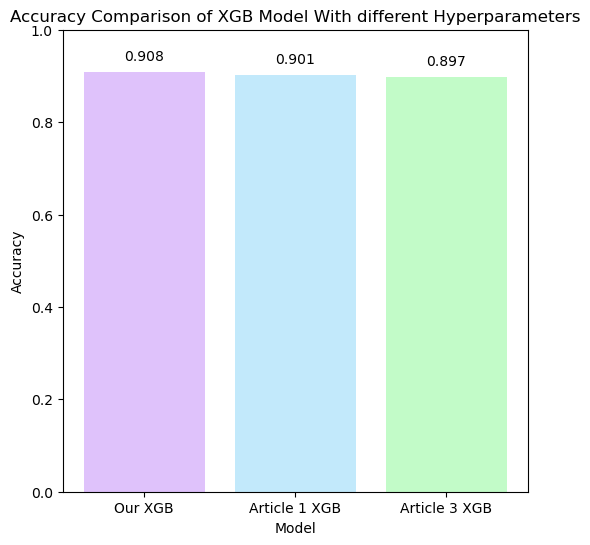

In [234]:
data = [xgb_accuracy, xgb_model_comp1_acc, xgb_model_comp3_acc]
labels = ['Our XGB', 'Article 1 XGB', 'Article 3 XGB']
colors = ['#dfc2fb', '#c2e9fb', '#c2fbc8']

plt.figure(figsize=(6, 6))

bars = plt.bar(labels, data, color = colors)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.02, f'{height:.3f}', ha='center', va='bottom')

plt.ylim(0, 1)  # Set y-axis limits
plt.title('Accuracy Comparison of XGB Model With different Hyperparameters')
plt.ylabel('Accuracy')
plt.xlabel('Model')
# plt.grid(True)
plt.show()